In [ ]:
cd cats_vs_dogs/

In [ ]:
#make sure classes

In [ ]:
import os, shutil

original_dataset_dir = "cats_vs_dogs/train"

dirs = []

base_dir = "cats_vs_dogs_small"
dirs.append(base_dir)

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)
   
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))
    
print("Done.")




In [ ]:
#check the size 
#training parameters: 500X 375 image, colored, so *3 = 562500, too big, scale down to 200 

#different sizes , data augmentation, data generator

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
#input dimension is 3,
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2,2)) 

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
#to reshape, do after the final pooling
model.add(layers.Flatten())
#6272 too big
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()
#binary, so 1



In [ ]:
#the out put should not be a image, should be binay, so add flattern

conv + pooling, 

# 6272 cells to one cell , so add another dense layer

#too radical



In [ ]:
from keras import optimizers

model.compile(
    optimizer = optimizers.RMSprop(lr = 1e-4),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]

)

#rmsprop, sometimes add

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range =40,
    width_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip =True
)



#random applies each of these 

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (150, 150),
    batch_size = 20,
    class_mode ="binary"

)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size= (150, 150),
    batch_size = 20,
    class_mode ="binary"
)



#goes into train folder, find the class names, do binary

# batch size : take 20 files, fit into training

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch =100,
                              epochs = 100,
                              validation_data = validation_generator,
                              validation_steps = 50
                             )
                            
#ignore , too long

Epoch 1/100
100/100 [==============================] - 120s 1s/step - loss: 0.6952 - acc: 0.5175 - val_loss: 0.6857 - val_acc: 0.5750
Epoch 2/100
 79/100 [======================>.......] - ETA: 21s - loss: 0.6861 - acc: 0.5380

In [95]:
import matplotlib.pyplot as plt

print(history.history) #history of training



{'val_loss': [0.69047364830970759, 0.65325026869773861, 0.63410696208477024, 0.59817569851875307, 0.59754428982734675, 0.59931096315383914, 0.58871088147163386, 0.58213450312614445, 0.55487547516822811, 0.62054292887449269, 0.56811792254447935, 0.80853736162185674, 0.56356453359127046, 0.70503707408905025, 0.71232231259346013, 0.83314795672893527, 0.74340034335851668, 0.77461360096931453, 0.73068877160549162, 0.68798883616924289, 0.79975310027599333, 0.95021718293428425, 0.81508958458900449, 0.91125844627618791, 1.0187207663059235, 0.96508567392826083, 1.0996511095762254, 1.1441186982393265, 1.0666696292161941, 1.1476460295915603], 'val_acc': [0.50000000119209287, 0.61500000476837158, 0.63899999976158139, 0.67499999821186063, 0.66899999737739568, 0.67499999523162846, 0.68799999952316282, 0.70299999952316283, 0.72799999594688414, 0.69900000095367432, 0.72100000143051146, 0.64499999940395358, 0.73400000095367435, 0.70899999499320987, 0.70899999976158146, 0.68399999976158143, 0.6949999994

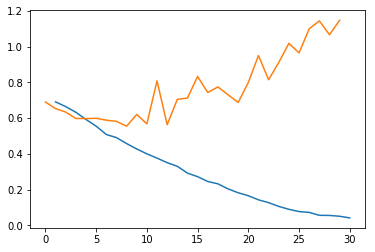

In [96]:

loss = history.history["loss"]
val_loss= history.history["val_loss"]
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, val_loss)
plt.show()


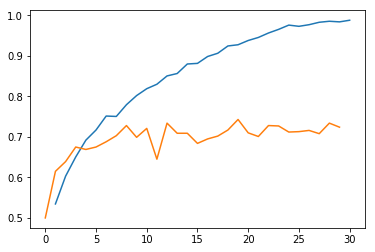

In [101]:
acc = history.history["acc"]
val_Acc = history.history["val_acc"]
epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, val_Acc)
#plt.plot(epochs, val_Acc)
plt.show()




In [ ]:
#overfitting

In [ ]:

#binary, so 1

In [9]:
import csv
with open('sampleSubmission.csv', 'rt') as f:
    reader = csv.reader(f)
    for row in reader:
        print (row)

['id', 'label']
['1', '0']
['2', '0']
['3', '0']
['4', '0']
['5', '0']
['6', '0']
['7', '0']
['8', '0']
['9', '0']
['10', '0']
['11', '0']
['12', '0']
['13', '0']
['14', '0']
['15', '0']
['16', '0']
['17', '0']
['18', '0']
['19', '0']
['20', '0']
['21', '0']
['22', '0']
['23', '0']
['24', '0']
['25', '0']
['26', '0']
['27', '0']
['28', '0']
['29', '0']
['30', '0']
['31', '0']
['32', '0']
['33', '0']
['34', '0']
['35', '0']
['36', '0']
['37', '0']
['38', '0']
['39', '0']
['40', '0']
['41', '0']
['42', '0']
['43', '0']
['44', '0']
['45', '0']
['46', '0']
['47', '0']
['48', '0']
['49', '0']
['50', '0']
['51', '0']
['52', '0']
['53', '0']
['54', '0']
['55', '0']
['56', '0']
['57', '0']
['58', '0']
['59', '0']
['60', '0']
['61', '0']
['62', '0']
['63', '0']
['64', '0']
['65', '0']
['66', '0']
['67', '0']
['68', '0']
['69', '0']
['70', '0']
['71', '0']
['72', '0']
['73', '0']
['74', '0']
['75', '0']
['76', '0']
['77', '0']
['78', '0']
['79', '0']
['80', '0']
['81', '0']
['82', '0']
['83', '0

['809', '0']
['810', '0']
['811', '0']
['812', '0']
['813', '0']
['814', '0']
['815', '0']
['816', '0']
['817', '0']
['818', '0']
['819', '0']
['820', '0']
['821', '0']
['822', '0']
['823', '0']
['824', '0']
['825', '0']
['826', '0']
['827', '0']
['828', '0']
['829', '0']
['830', '0']
['831', '0']
['832', '0']
['833', '0']
['834', '0']
['835', '0']
['836', '0']
['837', '0']
['838', '0']
['839', '0']
['840', '0']
['841', '0']
['842', '0']
['843', '0']
['844', '0']
['845', '0']
['846', '0']
['847', '0']
['848', '0']
['849', '0']
['850', '0']
['851', '0']
['852', '0']
['853', '0']
['854', '0']
['855', '0']
['856', '0']
['857', '0']
['858', '0']
['859', '0']
['860', '0']
['861', '0']
['862', '0']
['863', '0']
['864', '0']
['865', '0']
['866', '0']
['867', '0']
['868', '0']
['869', '0']
['870', '0']
['871', '0']
['872', '0']
['873', '0']
['874', '0']
['875', '0']
['876', '0']
['877', '0']
['878', '0']
['879', '0']
['880', '0']
['881', '0']
['882', '0']
['883', '0']
['884', '0']
['885', '0']

['2266', '0']
['2267', '0']
['2268', '0']
['2269', '0']
['2270', '0']
['2271', '0']
['2272', '0']
['2273', '0']
['2274', '0']
['2275', '0']
['2276', '0']
['2277', '0']
['2278', '0']
['2279', '0']
['2280', '0']
['2281', '0']
['2282', '0']
['2283', '0']
['2284', '0']
['2285', '0']
['2286', '0']
['2287', '0']
['2288', '0']
['2289', '0']
['2290', '0']
['2291', '0']
['2292', '0']
['2293', '0']
['2294', '0']
['2295', '0']
['2296', '0']
['2297', '0']
['2298', '0']
['2299', '0']
['2300', '0']
['2301', '0']
['2302', '0']
['2303', '0']
['2304', '0']
['2305', '0']
['2306', '0']
['2307', '0']
['2308', '0']
['2309', '0']
['2310', '0']
['2311', '0']
['2312', '0']
['2313', '0']
['2314', '0']
['2315', '0']
['2316', '0']
['2317', '0']
['2318', '0']
['2319', '0']
['2320', '0']
['2321', '0']
['2322', '0']
['2323', '0']
['2324', '0']
['2325', '0']
['2326', '0']
['2327', '0']
['2328', '0']
['2329', '0']
['2330', '0']
['2331', '0']
['2332', '0']
['2333', '0']
['2334', '0']
['2335', '0']
['2336', '0']
['2337

['3699', '0']
['3700', '0']
['3701', '0']
['3702', '0']
['3703', '0']
['3704', '0']
['3705', '0']
['3706', '0']
['3707', '0']
['3708', '0']
['3709', '0']
['3710', '0']
['3711', '0']
['3712', '0']
['3713', '0']
['3714', '0']
['3715', '0']
['3716', '0']
['3717', '0']
['3718', '0']
['3719', '0']
['3720', '0']
['3721', '0']
['3722', '0']
['3723', '0']
['3724', '0']
['3725', '0']
['3726', '0']
['3727', '0']
['3728', '0']
['3729', '0']
['3730', '0']
['3731', '0']
['3732', '0']
['3733', '0']
['3734', '0']
['3735', '0']
['3736', '0']
['3737', '0']
['3738', '0']
['3739', '0']
['3740', '0']
['3741', '0']
['3742', '0']
['3743', '0']
['3744', '0']
['3745', '0']
['3746', '0']
['3747', '0']
['3748', '0']
['3749', '0']
['3750', '0']
['3751', '0']
['3752', '0']
['3753', '0']
['3754', '0']
['3755', '0']
['3756', '0']
['3757', '0']
['3758', '0']
['3759', '0']
['3760', '0']
['3761', '0']
['3762', '0']
['3763', '0']
['3764', '0']
['3765', '0']
['3766', '0']
['3767', '0']
['3768', '0']
['3769', '0']
['3770

['5225', '0']
['5226', '0']
['5227', '0']
['5228', '0']
['5229', '0']
['5230', '0']
['5231', '0']
['5232', '0']
['5233', '0']
['5234', '0']
['5235', '0']
['5236', '0']
['5237', '0']
['5238', '0']
['5239', '0']
['5240', '0']
['5241', '0']
['5242', '0']
['5243', '0']
['5244', '0']
['5245', '0']
['5246', '0']
['5247', '0']
['5248', '0']
['5249', '0']
['5250', '0']
['5251', '0']
['5252', '0']
['5253', '0']
['5254', '0']
['5255', '0']
['5256', '0']
['5257', '0']
['5258', '0']
['5259', '0']
['5260', '0']
['5261', '0']
['5262', '0']
['5263', '0']
['5264', '0']
['5265', '0']
['5266', '0']
['5267', '0']
['5268', '0']
['5269', '0']
['5270', '0']
['5271', '0']
['5272', '0']
['5273', '0']
['5274', '0']
['5275', '0']
['5276', '0']
['5277', '0']
['5278', '0']
['5279', '0']
['5280', '0']
['5281', '0']
['5282', '0']
['5283', '0']
['5284', '0']
['5285', '0']
['5286', '0']
['5287', '0']
['5288', '0']
['5289', '0']
['5290', '0']
['5291', '0']
['5292', '0']
['5293', '0']
['5294', '0']
['5295', '0']
['5296

['6692', '0']
['6693', '0']
['6694', '0']
['6695', '0']
['6696', '0']
['6697', '0']
['6698', '0']
['6699', '0']
['6700', '0']
['6701', '0']
['6702', '0']
['6703', '0']
['6704', '0']
['6705', '0']
['6706', '0']
['6707', '0']
['6708', '0']
['6709', '0']
['6710', '0']
['6711', '0']
['6712', '0']
['6713', '0']
['6714', '0']
['6715', '0']
['6716', '0']
['6717', '0']
['6718', '0']
['6719', '0']
['6720', '0']
['6721', '0']
['6722', '0']
['6723', '0']
['6724', '0']
['6725', '0']
['6726', '0']
['6727', '0']
['6728', '0']
['6729', '0']
['6730', '0']
['6731', '0']
['6732', '0']
['6733', '0']
['6734', '0']
['6735', '0']
['6736', '0']
['6737', '0']
['6738', '0']
['6739', '0']
['6740', '0']
['6741', '0']
['6742', '0']
['6743', '0']
['6744', '0']
['6745', '0']
['6746', '0']
['6747', '0']
['6748', '0']
['6749', '0']
['6750', '0']
['6751', '0']
['6752', '0']
['6753', '0']
['6754', '0']
['6755', '0']
['6756', '0']
['6757', '0']
['6758', '0']
['6759', '0']
['6760', '0']
['6761', '0']
['6762', '0']
['6763

['8126', '0']
['8127', '0']
['8128', '0']
['8129', '0']
['8130', '0']
['8131', '0']
['8132', '0']
['8133', '0']
['8134', '0']
['8135', '0']
['8136', '0']
['8137', '0']
['8138', '0']
['8139', '0']
['8140', '0']
['8141', '0']
['8142', '0']
['8143', '0']
['8144', '0']
['8145', '0']
['8146', '0']
['8147', '0']
['8148', '0']
['8149', '0']
['8150', '0']
['8151', '0']
['8152', '0']
['8153', '0']
['8154', '0']
['8155', '0']
['8156', '0']
['8157', '0']
['8158', '0']
['8159', '0']
['8160', '0']
['8161', '0']
['8162', '0']
['8163', '0']
['8164', '0']
['8165', '0']
['8166', '0']
['8167', '0']
['8168', '0']
['8169', '0']
['8170', '0']
['8171', '0']
['8172', '0']
['8173', '0']
['8174', '0']
['8175', '0']
['8176', '0']
['8177', '0']
['8178', '0']
['8179', '0']
['8180', '0']
['8181', '0']
['8182', '0']
['8183', '0']
['8184', '0']
['8185', '0']
['8186', '0']
['8187', '0']
['8188', '0']
['8189', '0']
['8190', '0']
['8191', '0']
['8192', '0']
['8193', '0']
['8194', '0']
['8195', '0']
['8196', '0']
['8197

['9699', '0']
['9700', '0']
['9701', '0']
['9702', '0']
['9703', '0']
['9704', '0']
['9705', '0']
['9706', '0']
['9707', '0']
['9708', '0']
['9709', '0']
['9710', '0']
['9711', '0']
['9712', '0']
['9713', '0']
['9714', '0']
['9715', '0']
['9716', '0']
['9717', '0']
['9718', '0']
['9719', '0']
['9720', '0']
['9721', '0']
['9722', '0']
['9723', '0']
['9724', '0']
['9725', '0']
['9726', '0']
['9727', '0']
['9728', '0']
['9729', '0']
['9730', '0']
['9731', '0']
['9732', '0']
['9733', '0']
['9734', '0']
['9735', '0']
['9736', '0']
['9737', '0']
['9738', '0']
['9739', '0']
['9740', '0']
['9741', '0']
['9742', '0']
['9743', '0']
['9744', '0']
['9745', '0']
['9746', '0']
['9747', '0']
['9748', '0']
['9749', '0']
['9750', '0']
['9751', '0']
['9752', '0']
['9753', '0']
['9754', '0']
['9755', '0']
['9756', '0']
['9757', '0']
['9758', '0']
['9759', '0']
['9760', '0']
['9761', '0']
['9762', '0']
['9763', '0']
['9764', '0']
['9765', '0']
['9766', '0']
['9767', '0']
['9768', '0']
['9769', '0']
['9770

['11211', '0']
['11212', '0']
['11213', '0']
['11214', '0']
['11215', '0']
['11216', '0']
['11217', '0']
['11218', '0']
['11219', '0']
['11220', '0']
['11221', '0']
['11222', '0']
['11223', '0']
['11224', '0']
['11225', '0']
['11226', '0']
['11227', '0']
['11228', '0']
['11229', '0']
['11230', '0']
['11231', '0']
['11232', '0']
['11233', '0']
['11234', '0']
['11235', '0']
['11236', '0']
['11237', '0']
['11238', '0']
['11239', '0']
['11240', '0']
['11241', '0']
['11242', '0']
['11243', '0']
['11244', '0']
['11245', '0']
['11246', '0']
['11247', '0']
['11248', '0']
['11249', '0']
['11250', '0']
['11251', '0']
['11252', '0']
['11253', '0']
['11254', '0']
['11255', '0']
['11256', '0']
['11257', '0']
['11258', '0']
['11259', '0']
['11260', '0']
['11261', '0']
['11262', '0']
['11263', '0']
['11264', '0']
['11265', '0']
['11266', '0']
['11267', '0']
['11268', '0']
['11269', '0']
['11270', '0']
['11271', '0']
['11272', '0']
['11273', '0']
['11274', '0']
['11275', '0']
['11276', '0']
['11277', 

In [ ]:
#how to do data augmentation

